## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
import os
import keras
from keras.datasets import cifar10
import warnings
warnings.filterwarnings('ignore')

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()
# 資料前處理
def preproc_x(x, flatten=True):
    x = 2 * (((x - x.min()) / (x.max() - x.min())) - 0.5)
    if flatten:
        x = x.reshape((len(x),-1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [3]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [4]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer4 (Dense)       (None, 128)               16512     
                                                                 
 hidden_layer5 (Dense)       (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290  

In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [7]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 4s 14ms/step - loss: 1.6890 - accuracy: 0.3993 - val_loss: 1.5764 - val_accuracy: 0.4386
Epoch 2/100
196/196 [==============================] - 3s 14ms/step - loss: 1.4586 - accuracy: 0.4848 - val_loss: 1.4594 - val_accuracy: 0.4886
Epoch 3/100
196/196 [==============================] - 3s 14ms/step - loss: 1.3449 - accuracy: 0.5253 - val_loss: 1.4075 - val_accuracy: 0.5033
Epoch 4/100
196/196 [==============================] - 3s 14ms/step - loss: 1.2519 - accuracy: 0.5573 - val_loss: 1.3799 - val_accuracy: 0.5154
Epoch 5/100
196/196 [==============================] - 3s 14ms/step - loss: 1.1747 - accuracy: 0.5844 - val_loss: 1.3630 - val_accuracy: 0.5251
Epoch 6/100
196/196 [==============================] - 3s 15ms/step - loss: 1.0970 - accuracy: 0.6122 - val_loss: 1.3677 - val_accuracy: 0.5260
Epoch 7/100
196/196 [==============================] - 4s 18ms/step - loss: 1.0264 - accuracy: 0.6388 - val_loss: 1.3785 - val_accuracy:

196/196 [==============================] - 7s 35ms/step - loss: 0.1099 - accuracy: 0.9637 - val_loss: 3.8062 - val_accuracy: 0.5278
Epoch 58/100
196/196 [==============================] - 7s 37ms/step - loss: 0.0969 - accuracy: 0.9679 - val_loss: 3.8203 - val_accuracy: 0.5297
Epoch 59/100
196/196 [==============================] - 7s 35ms/step - loss: 0.1040 - accuracy: 0.9660 - val_loss: 3.9149 - val_accuracy: 0.5319
Epoch 60/100
196/196 [==============================] - 7s 35ms/step - loss: 0.0990 - accuracy: 0.9677 - val_loss: 3.8089 - val_accuracy: 0.5311
Epoch 61/100
196/196 [==============================] - 4s 18ms/step - loss: 0.1072 - accuracy: 0.9646 - val_loss: 3.9373 - val_accuracy: 0.5320
Epoch 62/100
196/196 [==============================] - 4s 18ms/step - loss: 0.0952 - accuracy: 0.9679 - val_loss: 3.8418 - val_accuracy: 0.5298
Epoch 63/100
196/196 [==============================] - 4s 20ms/step - loss: 0.1043 - accuracy: 0.9652 - val_loss: 3.8645 - val_accuracy: 0.531

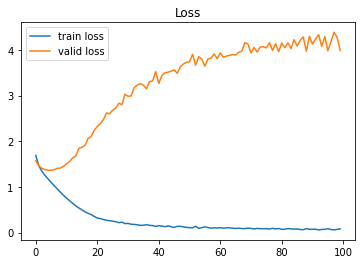

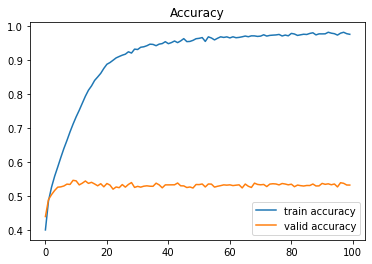

In [9]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()